In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

RANDOM_SEED=20090425

In [6]:
from scipy.stats import poisson
x = poisson.pmf(4,mu=2)
x

0.09022352215774178

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.40977648, -0.30977648, -0.20977648, -0.10977648, -0.00977648,
         0.09022352,  0.19022352,  0.29022352,  0.39022352,  0.49022352,
         0.59022352]),
 <a list of 10 Patch objects>)

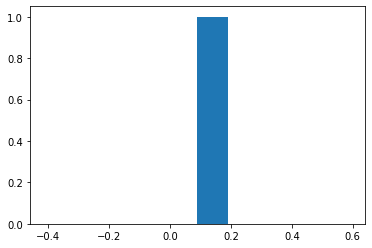

In [7]:
plt.hist(x)

In [2]:
radon = pd.read_csv('../data/radon.csv',index_col=0)
radon.head(5)

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


In [12]:
radon['county'].value_counts()

ST LOUIS      116
HENNEPIN      105
DAKOTA         63
ANOKA          52
WASHINGTON     46
             ... 
COOK            2
ROCK            2
WILKIN          1
MURRAY          1
MAHNOMEN        1
Name: county, Length: 85, dtype: int64

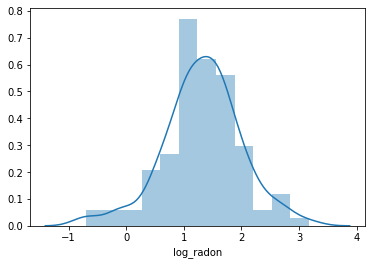

In [7]:
log = radon[radon['county']=='HENNEPIN']
hennepin_radon = log['log_radon']
sns.distplot(hennepin_radon)
#log.columns

(array([ 2.,  4.,  1., 14., 27., 25., 16.,  9.,  5.,  2.]),
 array([-0.69314718, -0.30728496,  0.07857727,  0.46443949,  0.85030171,
         1.23616393,  1.62202616,  2.00788838,  2.3937506 ,  2.77961283,
         3.16547505]),
 <a list of 10 Patch objects>)

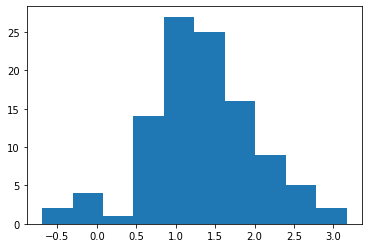

In [14]:
plt.hist(hennepin_radon)

In [15]:
hennepin_radon.shape

(105,)

In [16]:
hennepin_radon.mean()

1.3205900348074215

In [17]:
hennepin_radon.std()

0.681142856696366

In [18]:
from scipy.stats import norm
norm.cdf(hennepin_radon,0,10)

array([0.58236371, 0.54869999, 0.53142234, 0.52115907, 0.55610401,
       0.52558869, 0.53806147, 0.59579598, 0.53955996, 0.55512851,
       0.57984239, 0.51342077, 0.5       , 0.47236956, 0.53806147,
       0.57174905, 0.52957188, 0.56768163, 0.5450403 , 0.54374028,
       0.56838998, 0.55705568, 0.55512851, 0.6067295 , 0.57878549,
       0.53488159, 0.5423957 , 0.55977853, 0.51874353, 0.58563563,
       0.56908559, 0.58563563, 0.55412796, 0.52558869, 0.52763044,
       0.56838998, 0.53806147, 0.4957968 , 0.53142234, 0.5423957 ,
       0.55512851, 0.55889193, 0.56232303, 0.5423957 , 0.55705568,
       0.52115907, 0.55889193, 0.4910986 , 0.56838998, 0.54869999,
       0.56838998, 0.53806147, 0.54100341, 0.58472905, 0.54869999,
       0.5475177 , 0.58563563, 0.5234358 , 0.56976888, 0.60151144,
       0.54100341, 0.56232303, 0.56908559, 0.6037975 , 0.58087093,
       0.56976888, 0.56149326, 0.58087093, 0.53955996, 0.56064536,
       0.57110023, 0.53318989, 0.53650362, 0.55610401, 0.56149

In [1]:
# pip install pymc3 --user
import pymc3 as pm

/Users/rohitanand/.local/lib/python3.7/site-packages/theano/configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


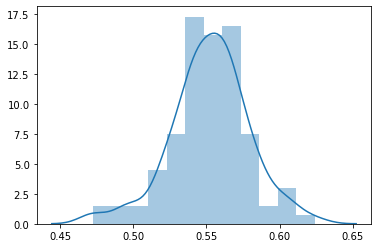

In [21]:
sns.distplot(norm.cdf(hennepin_radon,0,10))

In [4]:
from pymc3 import Uniform,Model,Normal

#Prior
with Model() as radon_model:
    µ = Normal('µ',mu=0,sd=10)
    sigma = Uniform('sigma',0,10)

In [11]:
#posterior
with radon_model:
    y = Normal('y',mu=µ,sd=sigma,observed=hennepin_radon)

In [15]:
from pymc3 import fit

with radon_model:

    samples = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 136.32: 100%|██████████| 10000/10000 [02:12<00:00, 75.51it/s]
Finished [100%]: Average Loss = 136.28


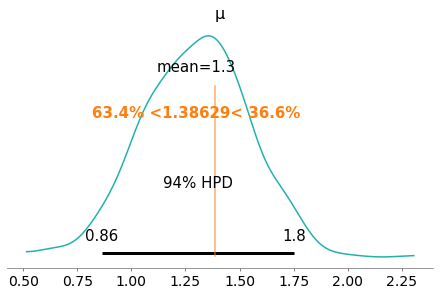

In [18]:
from pymc3 import plot_posterior
import numpy as np

plot_posterior(samples, varnames=['µ'], ref_val=np.log(4), color='LightSeaGreen');

In [20]:
mus = samples['µ']
sigmas = samples['sigma']
radon_samples = Normal.dist(mus, sigmas).random()
(radon_samples > np.log(4)).mean()

0.426